In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# SM stuff
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTraining.csv', index_col=0)
df.head(10)

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0
1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0
2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0
3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0
4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0
5,6,3306,6911,5.0,4.0,0.0,0.0,45,7.0,6,20174,13208000.0
6,6,2618,5383,4.0,3.0,1.0,0.0,9,8.0,5,20174,10036000.0
7,6,3810,7531,5.0,5.0,0.0,0.0,30,5.0,8,20140,15080000.0
8,6,2366,5008,3.0,2.0,1.0,0.0,28,6.0,6,20174,9093000.0
9,8,3401,6302,5.0,4.0,0.0,0.0,26,7.0,6,20182,12545000.0


In [2]:
#1
#1.1
av = df.groupby('Zipcode').agg(average = ('Crime_Rate','mean'))
av
hcr = av[av['average']==av['average'].max()]
print("The Zipcode with highest crime rate is: ")
hcr

The Zipcode with highest crime rate is: 


,average
Zipcode,
20140,6.511905


In [3]:
#1.2
ahp = df.groupby('Zipcode').agg(average = ('House_Price','mean'))
ahp
lahp = ahp[ahp['average']==ahp['average'].min()]
print("The Zipcode with lowest average house price rate is: ")
lahp

The Zipcode with lowest average house price rate is: 


,average
Zipcode,
20140,1.030618e+07


In [4]:
#1.3
df.corr()

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
School_Rating,1.000000,0.003273,-0.012608,0.005996,0.011234,0.016915,0.001310,-0.114875,0.373675,-0.651958,-0.402891,0.081382
House_Area,0.003273,1.000000,0.692192,0.956632,0.864089,0.126806,0.038590,0.003496,-0.001421,0.004005,0.050490,0.927668
Lot_Area,-0.012608,0.692192,1.000000,0.663507,0.628391,0.066005,0.039591,0.003279,0.041527,-0.028160,0.020762,0.875865
Room_No,0.005996,0.956632,0.663507,1.000000,0.899354,0.160627,0.058216,-0.012671,0.022116,-0.007340,0.018870,0.892501
Bath_No,0.011234,0.864089,0.628391,0.899354,1.000000,0.126592,0.054423,-0.001166,0.006643,-0.015384,-0.007733,0.816760
Garage,0.016915,0.126806,0.066005,0.160627,0.126592,1.000000,-0.003750,-0.048396,0.021130,-0.028996,-0.075111,0.124467
Pool,0.001310,0.038590,0.039591,0.058216,0.054423,-0.003750,1.000000,-0.003237,-0.052538,-0.014438,-0.014279,0.057346
House_Age,-0.114875,0.003496,0.003279,-0.012671,-0.001166,-0.048396,-0.003237,1.000000,-0.087509,0.065937,0.102555,-0.016291
Walkability,0.373675,-0.001421,0.041527,0.022116,0.006643,0.021130,-0.052538,-0.087509,1.000000,-0.597465,-0.191964,0.099872
Crime_Rate,-0.651958,0.004005,-0.028160,-0.007340,-0.015384,-0.028996,-0.014438,0.065937,-0.597465,1.000000,0.270189,-0.142806


In [5]:
print("With Respect to the above output it is clear that Walkability feature has strongest correlation with School_Rating")

With Respect to the above output it is clear that Walkability feature has strongest correlation with School_Rating


In [6]:
#1.4
import numpy as np
x = df[['School_Rating','House_Area','Lot_Area','Room_No','Bath_No','Garage','Pool','House_Age','Walkability','Crime_Rate','Zipcode']]
y= df['House_Price']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)
predict_Y = reg_model.predict(X_test)
max_relative_error = np.amax(np.absolute(Y_test-predict_Y)/(np.amax(Y_test)-np.amin(Y_test)))
print('max_relative_error (%):', 100*max_relative_error)

r2 = r2_score(Y_test,predict_Y)
print(r2)

max_relative_error (%): 8.646444337900096
0.9774507111556615


In [7]:
#1.5
df2 = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv",index_col=0)
predict_Y2 = reg_model.predict(df2)
print(predict_Y2)

[ 8561819.44871833  8980294.32638027 12881526.36890045  8599287.43466797
 10511332.01790485 12921742.59768683 10019012.08221002 11708426.88573512
 13117137.55306432  6771455.75731302]


In [8]:
#2
dfm = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true',index_col=[0]) 
dfm.head()
dfm['default'] = dfm.default.factorize()[0]
dfm['student'] = dfm.student.factorize()[0]

F:\Software\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


array([[<AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'student'}>],
       [<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'income'}>]], dtype=object)

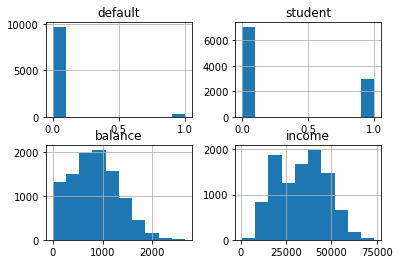

In [9]:
#2.1
dfm.hist()

In [10]:
dfm.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

<AxesSubplot:>

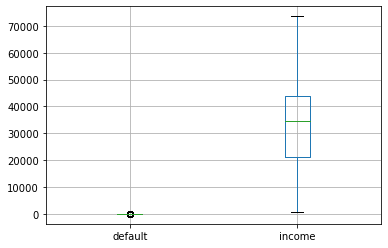

In [11]:
dfm.boxplot(column=['default','income'])

<AxesSubplot:>

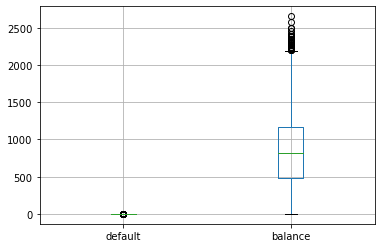

In [12]:
dfm.boxplot(column=['default','balance'])

In [13]:
from sklearn.metrics import confusion_matrix
x = dfm.loc[:,['balance']].values
y = dfm.loc[:,'default'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1930   11]
 [  40   19]]
Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


In [14]:
#2.4
x = dfm.drop("default",axis=1)
y = dfm['default']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)
y_predict = logreg.predict(X_test)
cm2 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm2)
total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1924   17]
 [  49   10]]
Accuracy :  0.967
Sensitivity :  0.9912416280267903
Specificity :  0.1694915254237288


In [15]:
#2.5
#High sensitivity means there are less chances of false negative results and a low specific test means that there are more chances of false positive results.